In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
# Load Result Set 1
R1 = pd.read_csv('./mylable-result/weather_predict_result1', 
                 sep='\t', skiprows = 6, header=None, 
                 names = ['predicted', 'true', 'decision_function', 'decision_function_true'])

# Load Results Set 2
R2 = pd.read_csv('./mylable-result/weather_predict_result2', 
                 sep ='\t', skiprows = 6, header = None,
                names = ['predicted', 'true', 'decision_function', 'decision_function_true'])

# Load Training Set
TRAIN = ((pd.read_csv('./mylable-result/weather_train', sep = '\t', header = None).iloc[:,0] == 'climate') * 1).values

# Make dummy classifier
dummy = DummyClassifier(strategy = 'stratified')

In [124]:
# Classification Report for R1
print '### R1 results:'
y_true = R1['true'].values
y_pred = R1['predicted'].values
print classification_report(y_true, y_pred)


print '############\n### DUMMY R1'

dummy.fit(np.arange(len(TRAIN)),TRAIN)
d_pred = dummy.predict(np.array([np.arange(len(R1))]).T)
d_prob1 = dummy.predict_proba(np.array([np.arange(len(R1))]).T)
print classification_report((y_true == 'climate') * 1, d_pred, target_names = ['non-climate', 'climate'])

print '\n\n\n\n\n\n\n########################################\n### R2 results:'

y_true = R2['true'].values
y_pred = R2['predicted'].values
print classification_report(y_true, y_pred)

print '############\n### DUMMY R2:'

dummy.fit(np.arange(len(TRAIN)),TRAIN)
d_pred = dummy.predict(np.array([np.arange(len(R2))]).T)
d_prob2 = dummy.predict_proba(np.array([np.arange(len(R2))]).T)
print classification_report((y_true == 'climate') * 1, d_pred, target_names = ['non-climate', 'climate'])

### R1 results:
             precision    recall  f1-score   support

    climate       0.75      0.17      0.27        36
non-climate       0.90      0.99      0.94       264

avg / total       0.88      0.89      0.86       300

############
### DUMMY R1
             precision    recall  f1-score   support

non-climate       0.88      0.89      0.88       264
    climate       0.12      0.11      0.11        36

avg / total       0.79      0.79      0.79       300








########################################
### R2 results:
             precision    recall  f1-score   support

    climate       0.75      0.11      0.19        55
non-climate       0.84      0.99      0.91       264

avg / total       0.83      0.84      0.79       319

############
### DUMMY R2:
             precision    recall  f1-score   support

non-climate       0.82      0.88      0.85       264
    climate       0.13      0.09      0.11        55

avg / total       0.70      0.74      0.72       319



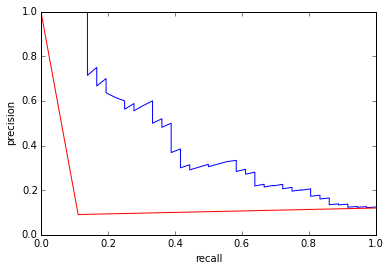

In [136]:
# Classification Report for R1
y_true = R1['true'].values
y_pred = R1['predicted'].values
y_probs = R1['decision_function_true'].values

prc, rec, thr = precision_recall_curve(y_true, y_probs, pos_label = 'climate')
Dprc, Drec, Dthr = precision_recall_curve(y_true, d_prob1[:,1], pos_label = 'climate')
plt.plot(rec, prc)
plt.plot(Drec,Dprc,'r')
plt.xlabel('recall')
plt.ylabel('precision')

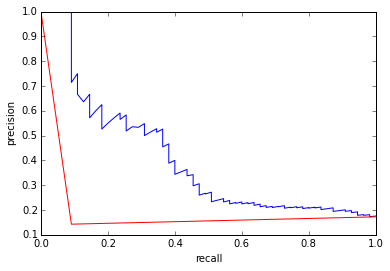

In [133]:
# Classification Report for R2
y_true = R2['true'].values
y_pred = R2['predicted'].values
y_probs = R2['decision_function_true'].values

prc, rec, thr = precision_recall_curve(y_true, y_probs, pos_label = 'climate')
Dprc, Drec, Dthr = precision_recall_curve(y_true, d_prob2[:,1], pos_label = 'climate')
plt.plot(rec, prc)
plt.plot(Drec,Dprc,'r')
plt.xlabel('recall')
plt.ylabel('precision')